In [1]:
import pandas as pd
import numpy as np
import requests
import json
#from yelp.client import Client
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
# lets try to get some data from yelp!
url = 'https://api.yelp.com/v3'
response = requests.get(url)

In [3]:
# check the status code
response.status_code

400

In [4]:
MY_API_KEY = "227vlJRYFiz_F0D8jfqDblADE28so5LV5HcaRKWz8rn2P1iqCdykA6qXgmaLtPrSBYwq94mKhNt7V0rdWWGJKmBEYec3n80Q6XWRQkvuVbKiETkVLEoNwBRTTzVqX3Yx"


# term = 'Axe Throwing'
# location = 'Brooklyn'
term = 'bagels'
location = 'Bergen County'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response_bagels = requests.get(url, headers=headers, params=url_params)

In [6]:
print(response_bagels)
#the response is 400 everytime I try to make my search limit over 50? why?

<Response [200]>


In [7]:
print(response_bagels.text)

, "rating": 4.0, "coordinates": {"latitude": 40.9253291941864, "longitude": -74.1022327377253}, "transactions": ["pickup", "delivery"], "price": "$", "location": {"address1": "34-05 Broadway", "address2": null, "address3": null, "city": "Fair Lawn", "zip_code": "07410", "country": "US", "state": "NJ", "display_address": ["34-05 Broadway", "Fair Lawn, NJ 07410"]}, "phone": "+12017734087", "display_phone": "(201) 773-4087", "distance": 2781.0318394223186}, {"id": "m6KUH9vS3JQXsAgKPZ9bWg", "alias": "j-and-j-bagel-ridgefield", "name": "J & J Bagel", "image_url": "https://s3-media2.fl.yelpcdn.com/bphoto/DCMwrwqwVQ3XnveXGYQzVQ/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/j-and-j-bagel-ridgefield?adjust_creative=GCm8E-vatg1JVje_1SJkFA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GCm8E-vatg1JVje_1SJkFA", "review_count": 54, "categories": [{"alias": "delis", "title": "Delis"}, {"alias": "bagels", "title": "Bagels"}], "rating": 4.0, "coordinates": {"latit

In [23]:
bagels = response_bagels.text
bagels = json.loads(bagels)
print(type(bagels))

<class 'dict'>


In [25]:
for key in bagels.keys():
    print(key)

businesses
total
region


In [27]:
bagels['businesses'][0]

{'id': 'KcEibAoIUQp6rl81u77vRA',
 'alias': 'river-road-hot-bagels-fair-lawn',
 'name': 'River Road Hot Bagels',
 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/SmODELiI1OUz9Wwls2i3eA/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/river-road-hot-bagels-fair-lawn?adjust_creative=GCm8E-vatg1JVje_1SJkFA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GCm8E-vatg1JVje_1SJkFA',
 'review_count': 143,
 'categories': [{'alias': 'bagels', 'title': 'Bagels'},
  {'alias': 'coffee', 'title': 'Coffee & Tea'},
  {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}],
 'rating': 4.5,
 'coordinates': {'latitude': 40.93468, 'longitude': -74.13374},
 'transactions': ['delivery'],
 'price': '$',
 'location': {'address1': '13-30 River Rd',
  'address2': '',
  'address3': '',
  'city': 'Fair Lawn',
  'zip_code': '07410',
  'country': 'US',
  'state': 'NJ',
  'display_address': ['13-30 River Rd', 'Fair Lawn, NJ 07410']},
 'phone': '+12017915646',
 'display_p

In [30]:
bagels['total']

8800

In [31]:
bagels['region']

{'center': {'longitude': -74.08355712890625, 'latitude': 40.945980470934344}}

In [36]:
#makeing the bagels dictionary a dataframe
bagels_df = pd.DataFrame.from_dict(bagels['businesses'])

In [39]:
bagels_df.columns

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'price',
       'location', 'phone', 'display_phone', 'distance'],
      dtype='object')

In [50]:
df = bagels_df.loc[:,['name', 'rating', 'review_count', 'price', 'location']]

In [49]:
why5stars = df[df['name'] == 'The Bagel Store']
why5stars

,name,rating,review_count,price,location
23,The Bagel Store,5.0,8,NaN,"{'address1': '69 5th Ave', 'address2': None, '..."


In [51]:
df

,name,rating,review_count,price,location
0,River Road Hot Bagels,4.5,143,$,"{'address1': '13-30 River Rd', 'address2': '',..."
1,Perry's Bagel Cafe,4.0,44,$,"{'address1': '501 Rt 17 S', 'address2': '', 'a..."
2,Paramus Bagels & Deli,4.0,27,$,"{'address1': '791 Rte 17', 'address2': None, '..."
3,Everything Bagel,4.0,28,NaN,"{'address1': '483 Rte 17 S', 'address2': '', '..."
4,Hot Bagels,4.0,60,$,"{'address1': '607 Saddle River Rd', 'address2'..."
5,Teaneck Road Hot Bagels,4.5,94,$,"{'address1': '976 Teaneck Rd', 'address2': '',..."
6,Bagel Supreme,4.0,27,$,"{'address1': '425 N Farview Ave', 'address2': ..."
7,Bagel Run,4.0,31,NaN,"{'address1': '505 Saddle River Rd', 'address2'..."
8,Kinderkamack Hot Bagels,4.0,57,$,"{'address1': '935 Kinderkamack Rd', 'address2'..."
9,Bagel Box,4.5,52,$,"{'address1': '191 US Highway 46 E', 'address2'..."


In [66]:
df = df.sort_values('rating', ascending = False)
df

,name,rating,review_count,price,location
23,The Bagel Store,5.0,8,NaN,"{'address1': '69 5th Ave', 'address2': None, '..."
18,Betsys' Bagels & Deli,5.0,1,NaN,"{'address1': '192 Main St', 'address2': '', 'a..."
37,Griddle This,4.5,43,$,"{'address1': '17 Grant Ave', 'address2': None,..."
5,Teaneck Road Hot Bagels,4.5,94,$,"{'address1': '976 Teaneck Rd', 'address2': '',..."
9,Bagel Box,4.5,52,$,"{'address1': '191 US Highway 46 E', 'address2'..."
10,The Bagel House,4.5,84,$,"{'address1': '324 N Main St', 'address2': '', ..."
38,Empire Bagels,4.5,107,$,"{'address1': '3101 Westchester Ave', 'address2..."
26,Plaza Bagel & Deli,4.5,115,$,"{'address1': '850 Van Houten Ave', 'address2':..."
43,Boxcar Bagel & Deli,4.5,83,$,"{'address1': '10 River Rd', 'address2': '', 'a..."
14,Bagel Nosh of Waldwick,4.5,82,$,"{'address1': '24 E Prospect St', 'address2': '..."


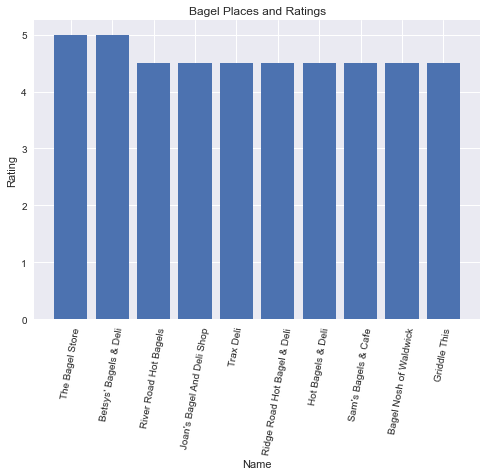

In [65]:
fig, ax = plt.subplots()
x = df['name'][:10]
y = df['rating'][:10]
ax.set_xlabel('Name')
ax.set_ylabel('Rating')
ax.set_title('Bagel Places and Ratings')
plt.xticks(rotation=80)
ax.bar(x,y)

plt.savefig('Bagels_namerating')

In [75]:
MY_API_KEY = "227vlJRYFiz_F0D8jfqDblADE28so5LV5HcaRKWz8rn2P1iqCdykA6qXgmaLtPrSBYwq94mKhNt7V0rdWWGJKmBEYec3n80Q6XWRQkvuVbKiETkVLEoNwBRTTzVqX3Yx"


term = 'bagels'
location = 'NYC'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response_bagelNYC = requests.get(url, headers=headers, params=url_params)

In [76]:
print(response_bagelNYC)
#search limit still won't let me exceed 50 and I have no idea why 

<Response [200]>


In [77]:
print(response_bagelNYC.text)

358, "longitude": -73.958862}, "transactions": ["delivery", "pickup"], "price": "$", "location": {"address1": "1229 1st Ave", "address2": "", "address3": "", "city": "New York", "zip_code": "10065", "country": "US", "state": "NY", "display_address": ["1229 1st Ave", "New York, NY 10065"]}, "phone": "+12127446444", "display_phone": "(212) 744-6444", "distance": 7206.574490626029}, {"id": "QdmvRfJb86BVvk6A-J5gAg", "alias": "modern-bread-and-bagel-new-york", "name": "Modern Bread and Bagel", "image_url": "https://s3-media1.fl.yelpcdn.com/bphoto/XySQYgsbD_axefpGshzz0A/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/modern-bread-and-bagel-new-york?adjust_creative=GCm8E-vatg1JVje_1SJkFA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GCm8E-vatg1JVje_1SJkFA", "review_count": 156, "categories": [{"alias": "breakfast_brunch", "title": "Breakfast & Brunch"}, {"alias": "bakeries", "title": "Bakeries"}, {"alias": "bagels", "title": "Bagels"}], "rating": 4.0, "coo

In [78]:
bagelNYC = response_bagelNYC.text
bagelNYC = json.loads(bagelNYC)
print(type(bagelNYC))

<class 'dict'>


In [80]:
for key in bagelNYC.keys():
    print(key)

businesses
total
region


In [81]:
#makeing the NYC bagels dictionary a dataframe
bagelNYC_df = pd.DataFrame.from_dict(bagelNYC['businesses'])

In [82]:
bagelNYC_df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,j1S3NUrkB3BVT49n_e76NQ,best-bagel-and-coffee-new-york,Best Bagel & Coffee,https://s3-media2.fl.yelpcdn.com/bphoto/9-8DVz...,False,https://www.yelp.com/biz/best-bagel-and-coffee...,3328,"[{'alias': 'bagels', 'title': 'Bagels'}, {'ali...",4.5,"{'latitude': 40.7522683, 'longitude': -73.9910...","[delivery, pickup]",$,"{'address1': '225 W 35th St', 'address2': '', ...",+12125644409,(212) 564-4409,5213.531501
1,VrCCr45dhN-RRM107iptdg,russ-and-daughters-new-york,Russ & Daughters,https://s3-media3.fl.yelpcdn.com/bphoto/EN-MJ-...,False,https://www.yelp.com/biz/russ-and-daughters-ne...,2241,"[{'alias': 'bagels', 'title': 'Bagels'}, {'ali...",4.5,"{'latitude': 40.722589, 'longitude': -73.98828...",[],$$,"{'address1': '179 E Houston St', 'address2': '...",+12124754880,(212) 475-4880,1972.496648
2,EhqrXqxMb70I1NrnMAGJMA,the-bagel-store-brooklyn-18,The Bagel Store,https://s3-media2.fl.yelpcdn.com/bphoto/ArO3vL...,False,https://www.yelp.com/biz/the-bagel-store-brook...,8,"[{'alias': 'bagels', 'title': 'Bagels'}, {'ali...",5.0,"{'latitude': 40.680582, 'longitude': -73.977476}","[delivery, pickup]",NaN,"{'address1': '69 5th Ave', 'address2': None, '...",+13475294301,(347) 529-4301,3106.996779
3,JV5oa5-KGdiWnqrKPoxSug,absolute-bagels-new-york,Absolute Bagels,https://s3-media2.fl.yelpcdn.com/bphoto/GjaYFL...,False,https://www.yelp.com/biz/absolute-bagels-new-y...,1411,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",4.5,"{'latitude': 40.80251, 'longitude': -73.96745}",[],$,"{'address1': '2788 Broadway', 'address2': '', ...",+12129322052,(212) 932-2052,11028.952386
4,c3eMI4_o4dPDDhPV_ibBYQ,ess-a-bagel-new-york,Ess-a-Bagel,https://s3-media1.fl.yelpcdn.com/bphoto/KJliJ0...,False,https://www.yelp.com/biz/ess-a-bagel-new-york?...,3630,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",4.0,"{'latitude': 40.756300559255, 'longitude': -73...","[delivery, pickup]",$,"{'address1': '831 3rd Ave', 'address2': '', 'a...",+12129801010,(212) 980-1010,6003.433037
5,oi39VAwo4-KGm_gSkWPCsQ,tompkins-square-bagels-avenue-a-new-york,Tompkins Square Bagels - Avenue A,https://s3-media1.fl.yelpcdn.com/bphoto/ueQExu...,False,https://www.yelp.com/biz/tompkins-square-bagel...,1118,"[{'alias': 'bagels', 'title': 'Bagels'}]",4.0,"{'latitude': 40.72823, 'longitude': -73.9823}","[delivery, pickup]",$,"{'address1': '165 Avenue A', 'address2': '', '...",+16463516520,(646) 351-6520,2727.847810
6,Gpc2-sPCXlIQUrkfi4bpzw,court-street-bagels-brooklyn,Court Street Bagels,https://s3-media2.fl.yelpcdn.com/bphoto/2WYCmV...,False,https://www.yelp.com/biz/court-street-bagels-b...,209,"[{'alias': 'bagels', 'title': 'Bagels'}]",4.0,"{'latitude': 40.68804, 'longitude': -73.99301}",[],$,"{'address1': '181 Court St', 'address2': '', '...",+17186243972,(718) 624-3972,1939.740017
7,mpCQzQAT4Rken3mFBlwqLw,bagels-on-the-square-new-york,Bagels on the Square,https://s3-media2.fl.yelpcdn.com/bphoto/xVap3s...,False,https://www.yelp.com/biz/bagels-on-the-square-...,442,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",3.5,"{'latitude': 40.730604, 'longitude': -74.002152}","[delivery, pickup]",$,"{'address1': '7 Carmine St', 'address2': '', '...",+12126913041,(212) 691-3041,2874.898250
8,pb_ryc8FYHpUPV56eV2Eyg,brooklyn-bagel-and-coffee-company-new-york-2,Brooklyn Bagel & Coffee Company,https://s3-media2.fl.yelpcdn.com/bphoto/hUTrAB...,False,https://www.yelp.com/biz/brooklyn-bagel-and-co...,1450,"[{'alias': 'bagels', 'title': 'Bagels'}, {'ali...",4.0,"{'latitude': 40.746183, 'longitude': -73.997642}","[delivery, pickup]",$,"{'address1': '286 8th Ave', 'address2': '', 'a...",+12129242824,(212) 924-2824,4538.650359
9,foO2N-TrdPBO-dFn6M35TA,brooklyn-bagel-and-coffee-company-new-york-8,Brooklyn Bagel & Coffee Company,https://s3-media1.fl.yelpcdn.com/bphoto/2ssnQh...,False,https://www.yelp.com/biz/brooklyn-bagel-and-co...,118,"[{'alias': 'bagels', 'title': 'Bagels

In [84]:
bagelNYC_df.columns

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'price',
       'location', 'phone', 'display_phone', 'distance'],
      dtype='object')

In [88]:
NYC_df = bagelNYC_df.loc[:, ['name', 'rating', 'location']].sort_values('rating', ascending = False)

In [89]:
NYC_df

,name,rating,location
25,Jeva Cafe,5.0,"{'address1': '513 Wilson Ave', 'address2': '',..."
2,The Bagel Store,5.0,"{'address1': '69 5th Ave', 'address2': None, '..."
9,Brooklyn Bagel & Coffee Company,4.5,"{'address1': '63 E 8th St', 'address2': None, ..."
42,Empire Bagels,4.5,"{'address1': '3101 Westchester Ave', 'address2..."
1,Russ & Daughters,4.5,"{'address1': '179 E Houston St', 'address2': '..."
13,Utopia Bagels,4.5,"{'address1': '1909 Utopia Pkwy', 'address2': '..."
11,Brooklyn Bagel & Coffee Company,4.5,"{'address1': '35-05 Broadway', 'address2': '',..."
10,Liberty Bagels Midtown,4.5,"{'address1': '260 W 35th St', 'address2': '', ..."
0,Best Bagel & Coffee,4.5,"{'address1': '225 W 35th St', 'address2': '', ..."
49,Juju's Bagels Cafe,4.5,"{'address1': '35-62 76th St', 'address2': '', ..."


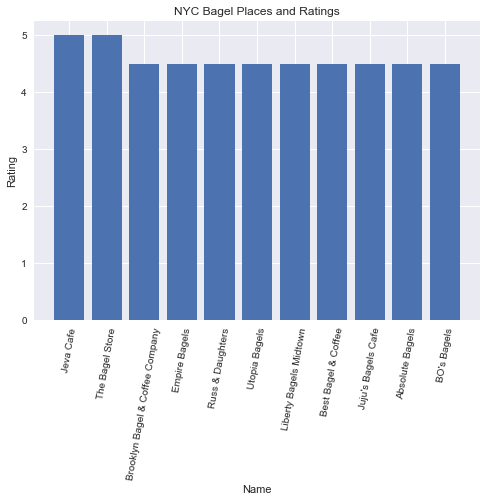

In [90]:
fig, ax = plt.subplots()
x = NYC_df['name'][:12]
y = NYC_df['rating'][:12]
ax.set_xlabel('Name')
ax.set_ylabel('Rating')
ax.set_title('NYC Bagel Places and Ratings')
plt.xticks(rotation=80)
ax.bar(x,y)

plt.savefig('BagelsNYC_namerating')

In [92]:
MY_API_KEY = "227vlJRYFiz_F0D8jfqDblADE28so5LV5HcaRKWz8rn2P1iqCdykA6qXgmaLtPrSBYwq94mKhNt7V0rdWWGJKmBEYec3n80Q6XWRQkvuVbKiETkVLEoNwBRTTzVqX3Yx"


term = 'bagels'
location = 'Washington DC'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response_bagelDC = requests.get(url, headers=headers, params=url_params)

In [93]:
print(response_bagelDC)

<Response [200]>


In [94]:
print(response_bagelDC.text)

QKHCrhlTKdsiBD5A/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/deli-zique-washington-2?adjust_creative=GCm8E-vatg1JVje_1SJkFA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GCm8E-vatg1JVje_1SJkFA", "review_count": 89, "categories": [{"alias": "coffee", "title": "Coffee & Tea"}, {"alias": "bagels", "title": "Bagels"}, {"alias": "sandwiches", "title": "Sandwiches"}], "rating": 4.0, "coordinates": {"latitude": 38.901534, "longitude": -77.0215305}, "transactions": ["delivery"], "price": "$", "location": {"address1": "650 Massachusetts Ave NW", "address2": null, "address3": "", "city": "Washington, DC", "zip_code": "20001", "country": "US", "state": "DC", "display_address": ["650 Massachusetts Ave NW", "Washington, DC 20001"]}, "phone": "+12024080417", "display_phone": "(202) 408-0417", "distance": 1341.25081187225}, {"id": "9xdPsw6s9EelttkM39TF_w", "alias": "bethesda-bagels-bethesda", "name": "Bethesda Bagels", "image_url": "https://s3-media1.fl.yelpcd

In [96]:
bagelDC = response_bagelDC.text
#json.loads() used to convert the JSON string doc into a python dictionary
bagelDC = json.loads(bagelDC)
print(type(bagelDC))

<class 'dict'>


In [98]:
for key in bagelDC.keys():
    print(key)

businesses
total
region


In [99]:
bagelDC_df = pd.DataFrame.from_dict(bagelDC['businesses'])

In [100]:
bagelDC_df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price
0,jyQobjkr19yLgdV2gGR-Ow,pearl-s-bagels-washington,Pearl’s Bagels,https://s3-media2.fl.yelpcdn.com/bphoto/3uEewb...,False,https://www.yelp.com/biz/pearl-s-bagels-washin...,29,"[{'alias': 'bagels', 'title': 'Bagels'}]",4.5,"{'latitude': 38.90356, 'longitude': -77.02156}",[],"{'address1': '1017 7th St NW', 'address2': '',...",,,1160.248870,NaN
1,0-OTVzmRIV1csYwQYuCa8g,call-your-mother-washington-2,Call Your Mother,https://s3-media3.fl.yelpcdn.com/bphoto/MKAXY1...,False,https://www.yelp.com/biz/call-your-mother-wash...,403,"[{'alias': 'bagels', 'title': 'Bagels'}, {'ali...",4.5,"{'latitude': 38.93138, 'longitude': -77.0233}",[delivery],"{'address1': '3301 Georgia Ave NW', 'address2'...",,,2318.007652,$$
2,XtzYoWiKUB64aQ6RHYaz8Q,bagels-etc-washington,Bagels Etc.,https://s3-media2.fl.yelpcdn.com/bphoto/nNCrXA...,False,https://www.yelp.com/biz/bagels-etc-washington...,488,"[{'alias': 'bagels', 'title': 'Bagels'}, {'ali...",4.0,"{'latitude': 38.90939, 'longitude': -77.04762}",[delivery],"{'address1': '2122 P St NW', 'address2': '', '...",+12024667171,(202) 466-7171,1483.247871,$
3,73AjCQfjOdGQRzQ36duuNg,call-your-mother-washington-3,Call Your Mother,https://s3-media1.fl.yelpcdn.com/bphoto/t6Tbg0...,False,https://www.yelp.com/biz/call-your-mother-wash...,22,"[{'alias': 'bagels', 'title': 'Bagels'}, {'ali...",4.0,"{'latitude': 38.881112, 'longitude': -76.995294}",[],"{'address1': '701 8th St SE', 'address2': None...",,,4540.494588,NaN
4,sXFBW4wWKmAraO4O_Z6nWg,call-your-mother-washington-4,Call Your Mother,https://s3-media4.fl.yelpcdn.com/bphoto/2ovO69...,False,https://www.yelp.com/biz/call-your-mother-wash...,20,"[{'alias': 'delis', 'title': 'Delis'}, {'alias...",4.0,"{'latitude': 38.9076174, 'longitude': -77.068837}",[],"{'address1': '3428 O St NW', 'address2': '', '...",,,3330.211280,NaN
5,hcfd7_wJQHbpE-s8YBrmZA,bethesda-bagels-washington-2,Bethesda Bagels,https://s3-media2.fl.yelpcdn.com/bphoto/_SI4ua...,False,https://www.yelp.com/biz/bethesda-bagels-washi...,486,"[{'alias': 'bagels', 'title': 'Bagels'}, {'ali...",3.5,"{'latitude': 38.9132118, 'longitude': -77.0459...",[delivery],"{'address1': '1718 Connecticut Ave NW', 'addre...",+12022999399,(202) 299-9399,1324.699445,$
6,bbnUvWlliOZ2s51Ue7Jhng,bread-bite-bakery-washington,Bread Bite Bakery,https://s3-media4.fl.yelpcdn.com/bphoto/0kMp1v...,False,https://www.yelp.com/biz/bread-bite-bakery-was...,69,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",4.0,"{'latitude': 38.9168651, 'longitude': -77.03488}","[pickup, delivery]","{'address1': '1506 U St NW', 'address2': '', '...",+12022990909,(202) 299-0909,715.581414,$$
7,wfVrDncmUtDsk7hl-i0TvA,bullfrog-bagels-washington-2,Bullfrog Bagels,https://s3-media4.fl.yelpcdn.com/bphoto/XPZgMg...,False,https://www.yelp.com/biz/bullfrog-bagels-washi...,239,"[{'alias': 'breakfast_brunch', 'title': 'Break...",3.0,"{'latitude': 38.899853, 'longitude': -76.986801}","[pickup, delivery]","{'address1': '1341 H St NE', 'address2': '', '...",+12024945615,(202) 494-5615,4000.261777,$
8,FXdIxIb0dXRnltRW10il_Q,mercy-me-washington-2,Mercy Me,https://s3-media1.fl.yelpcdn.com/bphoto/Y7hyN7...,False,https://www.yelp.com/biz/mercy-me-washington-2...,45,"[{'alias': 'newamerican', 'title': 'American (...",4.5,"{'latitude': 38.904794, 'longitude': -77.047581}",[],"{'address1': '1143 New Hampshire Ave NW', 'add...",,,1634.008806,NaN
9,Pmx3C5fCik2ugHrSn-A5SA,sos-your-mom-washington,So's Your Mom,https://s3-media3.fl.yelpcdn.com/bphoto/C-WGwE...,False,https://www.yelp.com/biz/sos-your-mom-washingt...,321,"[{'alias': 'delis', 'title': 'Delis'}, {'alias...",4.0,"{'latitude': 38.92171, 'longitude': -77.04383}",[delivery],"{'address1': '1831 Columbia Rd NW', 'address2'...",+12024623666,(202) 462-3666,1621.910563,$


In [101]:
DC_df = bagelDC_df.loc[:, ['name', 'rating', 'location']].sort_values('rating', ascending = False)

In [102]:
DC_df

,name,rating,location
36,Firehook Café,5.0,"{'address1': '401 F St NW', 'address2': 'Fl 2'..."
21,Bullfrog Bagels Food Truck,5.0,"{'address1': '4810 Wisconsin Ave NW', 'address..."
20,Call Your Mother,5.0,"{'address1': '8804 Old Georgetown Rd', 'addres..."
33,Heat Da Spot,5.0,"{'address1': '3213 Georgia Ave NW', 'address2'..."
0,Pearl’s Bagels,4.5,"{'address1': '1017 7th St NW', 'address2': '',..."
28,A Baked Joint,4.5,"{'address1': '430 K St NW', 'address2': '', 'a..."
17,Baked By Yael,4.5,"{'address1': '3000 Connecticut Ave NW', 'addre..."
16,The Pretzel Bakery,4.5,"{'address1': '257 15th St SE', 'address2': Non..."
15,Buffalo & Bergen - Capitol Hill,4.5,"{'address1': '240 Massachusetts Ave NE', 'addr..."
1,Call Your Mother,4.5,"{'address1': '3301 Georgia Ave NW', 'address2'..."


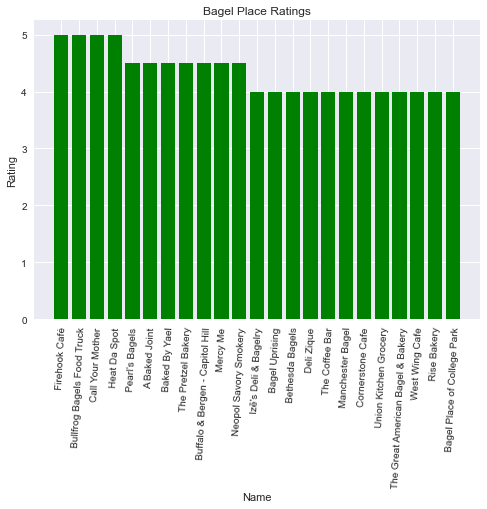

In [109]:
fig, ax = plt.subplots()
x = DC_df['name'][:24]
y = DC_df['rating'][:24]
ax.set_xlabel('Name')
ax.set_ylabel('Rating')
ax.set_title('Bagel Place Ratings')
plt.xticks(rotation=87)
ax.bar(x,y, color = 'green')

plt.savefig('BagelsDC_namerating')

In [8]:
API_KEY = "227vlJRYFiz_F0D8jfqDblADE28so5LV5HcaRKWz8rn2P1iqCdykA6qXgmaLtPrSBYwq94mKhNt7V0rdWWGJKmBEYec3n80Q6XWRQkvuVbKiETkVLEoNwBRTTzVqX3Yx"

term = 'ice cream'
location = 'NYC'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT,
                'offset': 100,
            }
            # return request(API_KEY, url_params=url_params)
response_NYCicecream = requests.get(url, headers=headers, params=url_params)

In [9]:
print(response_NYCicecream)

<Response [200]>


In [10]:
print(response_NYCicecream.text)

, "coordinates": {"latitude": 40.74634, "longitude": -73.9779}, "transactions": ["delivery"], "location": {"address1": "522 3rd Ave", "address2": "", "address3": null, "city": "New York", "zip_code": "10016", "country": "US", "state": "NY", "display_address": ["522 3rd Ave", "New York, NY 10016"]}, "phone": "+12126854900", "display_phone": "(212) 685-4900", "distance": 4757.791214886229}, {"id": "graCalOReFFFOaC0febodw", "alias": "minus-celsius-ice-cream-new-york", "name": "Minus Celsius Ice Cream", "image_url": "https://s3-media4.fl.yelpcdn.com/bphoto/Emt4x_xaStiVORS1P2NrnA/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/minus-celsius-ice-cream-new-york?adjust_creative=GCm8E-vatg1JVje_1SJkFA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GCm8E-vatg1JVje_1SJkFA", "review_count": 150, "categories": [{"alias": "icecream", "title": "Ice Cream & Frozen Yogurt"}, {"alias": "bubbletea", "title": "Bubble Tea"}], "rating": 4.0, "coordinates": {"latitude": 40

In [11]:
NYCicecream = response_NYCicecream.text
NYCicecream = json.loads(NYCicecream)
print(type(NYCicecream))

<class 'dict'>


In [12]:
for key in NYCicecream.keys():
    print(key)

businesses
total
region


In [13]:
NYCicecream_df = pd.DataFrame.from_dict(NYCicecream['businesses'])

In [14]:
NYCicecream_df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,R1OlpKHgFM4wW8f_UtGf4w,kith-treats-brooklyn,KITH Treats,https://s3-media2.fl.yelpcdn.com/bphoto/CWVRow...,False,https://www.yelp.com/biz/kith-treats-brooklyn?...,122,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.0,"{'latitude': 40.68121, 'longitude': -73.97501}",[],$,"{'address1': '233 Flatbush Ave', 'address2': N...",+13478896114,(347) 889-6114,3146.268258
1,V3ZvBwLvKBSohMT1j6C-gg,william-greenberg-desserts-new-york,William Greenberg Desserts,https://s3-media2.fl.yelpcdn.com/bphoto/zRe-YW...,False,https://www.yelp.com/biz/william-greenberg-des...,247,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",4.0,"{'latitude': 40.77854, 'longitude': -73.96069}",[delivery],$$,"{'address1': '1100 Madison Ave', 'address2': '...",+12128611340,(212) 861-1340,8631.197677
2,C3ljwYOe6FevcgZ27ZuoQQ,cookies-n-cream-bronxville,Cookies N Cream,https://s3-media4.fl.yelpcdn.com/bphoto/bCesw9...,False,https://www.yelp.com/biz/cookies-n-cream-bronx...,16,"[{'alias': 'bakeries', 'title': 'Bakeries'}]",4.0,"{'latitude': 40.940011, 'longitude': -73.8339574}","[pickup, delivery]",NaN,"{'address1': '10 Park Pl', 'address2': None, '...",+19142027560,(914) 202-7560,29365.244209
3,3tJrsxawK_-njO-yJh6CIQ,big-gay-ice-cream-new-york-2,Big Gay Ice Cream,https://s3-media2.fl.yelpcdn.com/bphoto/g1i_vg...,False,https://www.yelp.com/biz/big-gay-ice-cream-new...,69,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",3.5,"{'latitude': 40.70715, 'longitude': -74.00306}",[],$$,"{'address1': '207 Front St', 'address2': '', '...",,,768.059847
4,_gHV_ocOgIY6z7Sy_zfjEA,van-leeuwen-ice-cream-new-york-9,Van Leeuwen Ice Cream,https://s3-media2.fl.yelpcdn.com/bphoto/87VDQX...,False,https://www.yelp.com/biz/van-leeuwen-ice-cream...,78,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.0,"{'latitude': 40.721971, 'longitude': -73.996098}","[pickup, delivery]",$$,"{'address1': '45 Spring St', 'address2': '', '...",+19176393147,(917) 639-3147,1843.905412


In [15]:
NYCicecream_df.columns

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'price',
       'location', 'phone', 'display_phone', 'distance'],
      dtype='object')

In [16]:
NYCicecream_df = NYCicecream_df.loc[:,['name', 'alias', 'rating', 'price', 'location' ]]

In [17]:
NYCicecream_df = NYCicecream_df.sort_values('rating', ascending=False)
NYCicecream_df.head(7)

,name,alias,rating,price,location
24,Sweet Dynasty,sweet-dynasty-brooklyn-2,5.0,$,"{'address1': '5918 5th Ave', 'address2': None,..."
21,Van Leeuwen Ice Cream,van-leeuwen-ice-cream-new-york-33,5.0,NaN,"{'address1': '120 Macdougal St', 'address2': '..."
17,Vida’s Brooklyn,vida-s-brooklyn-brooklyn,5.0,NaN,"{'address1': '704 Dekalb Ave', 'address2': Non..."
27,Crema,crema-jersey-city,5.0,$$,"{'address1': '695 Bergen Ave', 'address2': Non..."
38,Oddfellows Ice Cream Co,oddfellows-ice-cream-co-brooklyn-8,5.0,NaN,"{'address1': '334 Furman St', 'address2': '', ..."
13,Last Licks Homemade Ice Cream,last-licks-homemade-ice-cream-east-hanover,4.5,$,"{'address1': '134 Ridgedale Ave', 'address2': ..."
14,Dubl Twister,dubl-twister-new-york,4.5,NaN,"{'address1': '1443 York Ave', 'address2': '', ..."


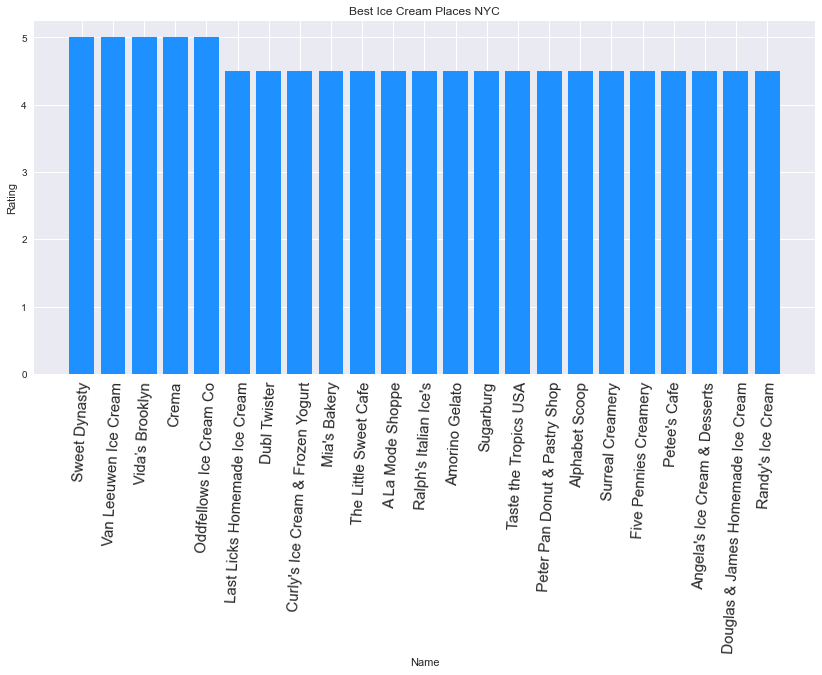

In [26]:
fig, ax = plt.subplots(figsize=(14,6.5))
x = NYCicecream_df['name'][:24]
y = NYCicecream_df['rating'][:24]
ax.set_xlabel('Name',)
ax.set_ylabel('Rating')
ax.set_title('Best Ice Cream Places NYC')
plt.xticks(rotation=87, fontsize = 15)
ax.bar(x,y, color = 'dodgerblue')

plt.savefig('IceCreamNYC_namerating')

In [27]:
API_KEY = "227vlJRYFiz_F0D8jfqDblADE28so5LV5HcaRKWz8rn2P1iqCdykA6qXgmaLtPrSBYwq94mKhNt7V0rdWWGJKmBEYec3n80Q6XWRQkvuVbKiETkVLEoNwBRTTzVqX3Yx"

term = 'ice cream'
location = 'Boston'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT,
                'offset': 100,
            }
            # return request(API_KEY, url_params=url_params)
response_Bostonicecream = requests.get(url, headers=headers, params=url_params)

In [28]:
print(response_Bostonicecream)

<Response [200]>


In [29]:
Bostonicecream = response_Bostonicecream.text
Bostonicecream = json.loads(Bostonicecream)
print(type(Bostonicecream))

<class 'dict'>


In [30]:
Bostonicecream_df = pd.DataFrame.from_dict(Bostonicecream['businesses'])

In [31]:
Bostonicecream_df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,tb9FuJRuh_oSyssRJdLuGg,au-chocolat-boston,Au Chocolat,https://s3-media2.fl.yelpcdn.com/bphoto/CbEiL_...,False,https://www.yelp.com/biz/au-chocolat-boston?ad...,34,"[{'alias': 'candy', 'title': 'Candy Stores'}, ...",4.0,"{'latitude': 42.3536442233029, 'longitude': -7...",[],$$,"{'address1': '35 High St', 'address2': '', 'ad...",+16177371197,(617) 737-1197,1422.564213
1,7Y2Yr5SbJfQ2oeKrpTeQBA,jp-licks-jamaica-plain,JP Licks,https://s3-media1.fl.yelpcdn.com/bphoto/nnG-cI...,False,https://www.yelp.com/biz/jp-licks-jamaica-plai...,345,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.0,"{'latitude': 42.312815, 'longitude': -71.114091}","[pickup, delivery]",$,"{'address1': '659 Center St', 'address2': '', ...",+16175246740,(617) 524-6740,5251.236152
2,s2RP7FLd_6ti_cKIv7IVqQ,coco-leaf-boston,Coco Leaf,https://s3-media1.fl.yelpcdn.com/bphoto/At9W0k...,False,https://www.yelp.com/biz/coco-leaf-boston?adju...,235,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",4.5,"{'latitude': 42.30007, 'longitude': -71.05991}",[delivery],$,"{'address1': '1480 Dorchester Ave', 'address2'...",+16175060010,(617) 506-0010,5386.431533
3,tl1QcEr3lJWgIbH9mIyYuw,emack-and-bolios-north-station-boston,Emack & Bolios North Station,https://s3-media3.fl.yelpcdn.com/bphoto/m_Pwdv...,False,https://www.yelp.com/biz/emack-and-bolios-nort...,30,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",3.0,"{'latitude': 42.366414, 'longitude': -71.062159}",[],$$,"{'address1': '100 Legends Wy', 'address2': Non...",+16172273622,(617) 227-3622,2195.904082
4,3KT0PER90UIxVVx9zuzHVA,caffe-paradiso-boston,Caffe Paradiso,https://s3-media2.fl.yelpcdn.com/bphoto/zD9DiY...,False,https://www.yelp.com/biz/caffe-paradiso-boston...,237,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",4.0,"{'latitude': 42.36322, 'longitude': -71.0548}",[delivery],$$,"{'address1': '255 Hanover St', 'address2': '',...",+16177421768,(617) 742-1768,2178.761135


In [32]:
Bostonicecream_df = Bostonicecream_df.loc[:,['name', 'alias', 'rating', 'price', 'location' ]].sort_values('rating', ascending = False)
Bostonicecream_df.head()

,name,alias,rating,price,location
44,Zack's Ice Cream,zacks-ice-cream-everett-5,5.0,NaN,"{'address1': '69 Norman St', 'address2': None,..."
15,Saratoga Market Ice Cream,saratoga-market-ice-cream-boston,5.0,$,"{'address1': '16 Trident St', 'address2': '', ..."
25,Hough Many Scoops,hough-many-scoops-quincy,4.5,$$,"{'address1': '1094 Sea St', 'address2': None, ..."
2,Coco Leaf,coco-leaf-boston,4.5,$,"{'address1': '1480 Dorchester Ave', 'address2'..."
5,Gracenote Coffee,gracenote-coffee-boston-6,4.5,$,"{'address1': '108 Lincoln St', 'address2': '',..."


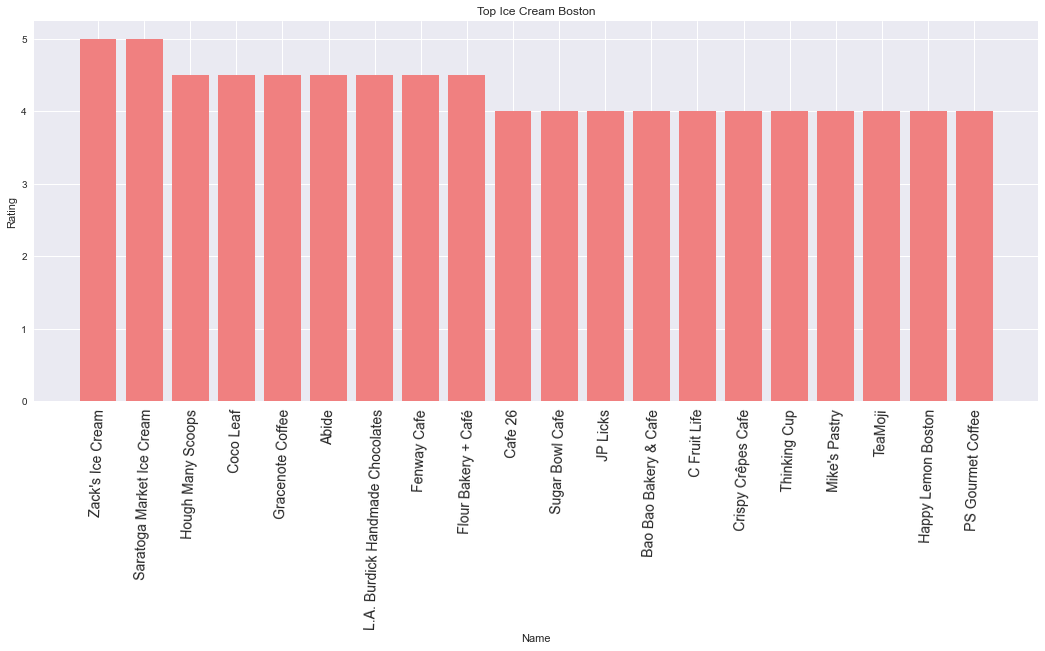

In [36]:
fig, ax = plt.subplots(figsize=(18,7))
x = Bostonicecream_df['name'][:20]
y = Bostonicecream_df['rating'][:20]
ax.set_xlabel('Name')
ax.set_ylabel('Rating')
ax.set_title('Top Ice Cream Boston')
plt.xticks(rotation=88, fontsize = 14)
ax.bar(x,y, color = 'lightcoral')

plt.savefig('IceCreamBoston_namerating')

In [16]:
# Bostonicecream_df

In [9]:
MY_API_KEY = "227vlJRYFiz_F0D8jfqDblADE28so5LV5HcaRKWz8rn2P1iqCdykA6qXgmaLtPrSBYwq94mKhNt7V0rdWWGJKmBEYec3n80Q6XWRQkvuVbKiETkVLEoNwBRTTzVqX3Yx"

term = 'ice cream'
location = 'Philadelphia'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }

response_Phillyicecream = requests.get(url, headers=headers, params=url_params)

In [10]:
print(response_Phillyicecream)

<Response [200]>


In [11]:
Phillyicecream = response_Phillyicecream.text
Phillyicecream = json.loads(Phillyicecream)
print(type(Phillyicecream))

<class 'dict'>


In [12]:
PhillyIcecream = pd.DataFrame.from_dict(Phillyicecream['businesses'])

In [13]:
PhillyIcecream.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,qQO7ErS_RAN4Vs1uX0L55Q,the-franklin-fountain-philadelphia,The Franklin Fountain,https://s3-media2.fl.yelpcdn.com/bphoto/RrlkE8...,False,https://www.yelp.com/biz/the-franklin-fountain...,1988,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.0,"{'latitude': 39.94957, 'longitude': -75.14291}","[delivery, pickup]",$$,"{'address1': '116 Market St', 'address2': None...",+12156271899,(215) 627-1899,2459.795704
1,pCDx24yFgVZ3EwOwDMedHg,c-and-c-creamery-philadelphia,C & C Creamery,https://s3-media3.fl.yelpcdn.com/bphoto/Wm4nH0...,False,https://www.yelp.com/biz/c-and-c-creamery-phil...,208,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.5,"{'latitude': 40.02324, 'longitude': -75.20772}",[],$,"{'address1': '5461 Ridge Ave', 'address2': '',...",+12154871920,(215) 487-1920,8329.298847
2,TsoCCouCudxL2mwn86SFiQ,arctic-scoop-philadelphia,Arctic Scoop,https://s3-media2.fl.yelpcdn.com/bphoto/nzcof6...,False,https://www.yelp.com/biz/arctic-scoop-philadel...,147,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.5,"{'latitude': 39.927457, 'longitude': -75.166521}",[],$$,"{'address1': '1812 E Passyunk Ave', 'address2'...",,,2954.310618
3,qOrzaDT6Q92tVnBziWw8NA,weckerlys-ice-cream-philadelphia-3,Weckerly's Ice Cream,https://s3-media3.fl.yelpcdn.com/bphoto/qDCngV...,False,https://www.yelp.com/biz/weckerlys-ice-cream-p...,291,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.5,"{'latitude': 39.9689478, 'longitude': -75.1348...",[delivery],$$,"{'address1': '9 West Girard Ave', 'address2': ...",+12154232000,(215) 423-2000,3530.504624
4,qcn10016DUkbgCbQi9L1WA,bassetts-ice-cream-philadelphia,Bassetts Ice Cream,https://s3-media1.fl.yelpcdn.com/bphoto/6eQJY5...,False,https://www.yelp.com/biz/bassetts-ice-cream-ph...,455,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.5,"{'latitude': 39.9533865860688, 'longitude': -7...","[delivery, pickup]",$$,"{'address1': '45 N 12th St', 'address2': '', '...",+12159254315,(215) 925-4315,1011.146251


In [19]:
PhillyIcecream = PhillyIcecream.loc[:,['name', 'alias', 'rating', 'price', 'location', 'review_count']].sort_values('rating', ascending = False)

In [20]:
PhillyIcecream.head(8)

,name,alias,rating,price,location,review_count
36,Latteria,latteria-swedesboro,5.0,$$,"{'address1': '95 Woodstown Rd', 'address2': ''...",91
11,Harper's Ice Cream,harpers-ice-cream-philadelphia,5.0,NaN,"{'address1': '2816 W Girard Ave', 'address2': ...",3
31,Mixd Ice Cream & Cereal Bar,mixd-ice-cream-and-cereal-bar-willow-grove,5.0,NaN,"{'address1': '', 'address2': '', 'address3': N...",1
39,A La Mousse,a-la-mousse-philadelphia-6,5.0,NaN,"{'address1': '1622 South St', 'address2': '', ...",30
27,Crave Creamery,crave-creamery-springfield,5.0,$$,"{'address1': '1158 Baltimore Pike', 'address2'...",27
19,Ice Cave,ice-cave-philadelphia-6,5.0,$,"{'address1': '4520 Baltimore Ave', 'address2':...",127
10,Parlour Ice Cream,parlour-ice-cream-ardmore,5.0,NaN,"{'address1': '18 W Lancaster Ave', 'address2':...",27
41,Yardley Ice House,yardley-ice-house-yardley,4.5,$,"{'address1': '77 S Main St', 'address2': '', '...",70


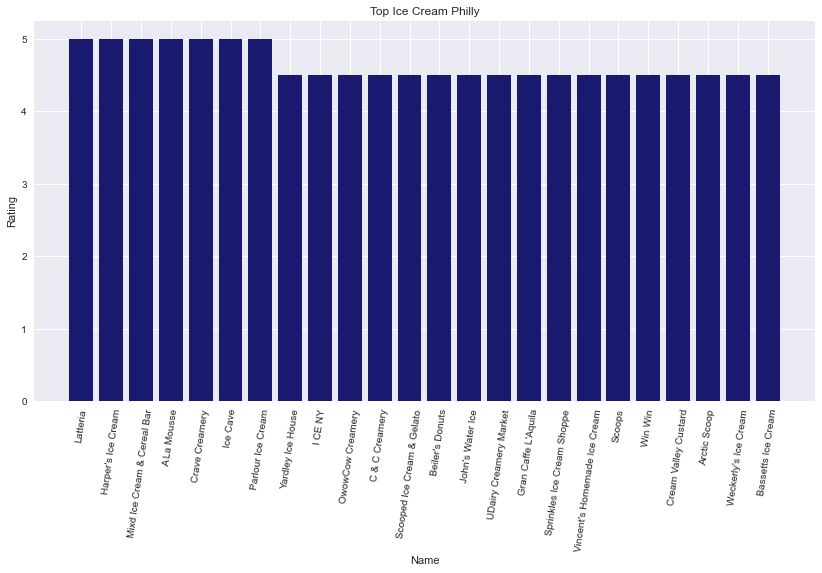

In [21]:
fig, ax = plt.subplots(figsize=(14,7))
x = PhillyIcecream['name'][:25]
y = PhillyIcecream['rating'][:25]
ax.set_xlabel('Name')
ax.set_ylabel('Rating')
ax.set_title('Top Ice Cream Philly')
plt.xticks(rotation=82)
ax.bar(x,y, color = 'midnightblue')

plt.savefig('IceCreamPhilly_namerating')

In [22]:
MY_API_KEY = "227vlJRYFiz_F0D8jfqDblADE28so5LV5HcaRKWz8rn2P1iqCdykA6qXgmaLtPrSBYwq94mKhNt7V0rdWWGJKmBEYec3n80Q6XWRQkvuVbKiETkVLEoNwBRTTzVqX3Yx"

term = 'cheesesteak'
location = 'Philadelphia'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }

response_PhillyCheesesteak = requests.get(url, headers=headers, params=url_params)

In [23]:
print(response_PhillyCheesesteak)

<Response [200]>


In [24]:
PhillyCheesesteak = response_PhillyCheesesteak.text
PhillyCheesesteak = json.loads(PhillyCheesesteak)
print(type(PhillyCheesesteak))

<class 'dict'>


In [25]:
PhillyCheesesteak = pd.DataFrame.from_dict(PhillyCheesesteak['businesses'])
PhillyCheesesteak.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,RQAF6a0akMiot5lZZnMNNw,dalessandros-steaks-and-hoagies-philadelphia,Dalessandro's Steaks and Hoagies,https://s3-media3.fl.yelpcdn.com/bphoto/VKPQ0B...,False,https://www.yelp.com/biz/dalessandros-steaks-a...,2405,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...",4.5,"{'latitude': 40.029494, 'longitude': -75.2059714}",[delivery],$,"{'address1': '600 Wendover St', 'address2': ''...",+12154825407,(215) 482-5407,8924.599279
1,jxEMFqwDJXjCxmcm5t5jVQ,cleavers-philadelphia,Cleavers,https://s3-media3.fl.yelpcdn.com/bphoto/TRyWS_...,False,https://www.yelp.com/biz/cleavers-philadelphia...,1141,"[{'alias': 'cheesesteaks', 'title': 'Cheeseste...",4.0,"{'latitude': 39.9513931274414, 'longitude': -7...","[pickup, delivery]",$$,"{'address1': '108 S 18th St', 'address2': '', ...",+12155153828,(215) 515-3828,268.685385
2,-mIlmp5l4hKlp1tvHRdvTg,sonnys-famous-steaks-philadelphia,Sonny's Famous Steaks,https://s3-media2.fl.yelpcdn.com/bphoto/gRI3p_...,False,https://www.yelp.com/biz/sonnys-famous-steaks-...,1559,"[{'alias': 'cheesesteaks', 'title': 'Cheeseste...",4.0,"{'latitude': 39.9499178538079, 'longitude': -7...",[delivery],$$,"{'address1': '228 Market St', 'address2': '', ...",+12156295760,(215) 629-5760,2291.962216
3,LM54ufrINJWoTN5imV8Etw,johns-roast-pork-philadelphia,John's Roast Pork,https://s3-media4.fl.yelpcdn.com/bphoto/C5APCS...,False,https://www.yelp.com/biz/johns-roast-pork-phil...,1445,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...",4.5,"{'latitude': 39.9210273851256, 'longitude': -7...",[delivery],$$,"{'address1': '14 E Snyder Ave', 'address2': ''...",+12154631951,(215) 463-1951,4271.479109
4,q-zV08jt6U-q05SMEuQJAQ,the-original-tony-lukes-philadelphia-2,The Original Tony Lukes,https://s3-media4.fl.yelpcdn.com/bphoto/02xz11...,False,https://www.yelp.com/biz/the-original-tony-luk...,1835,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...",4.0,"{'latitude': 39.9141065085686, 'longitude': -7...",[delivery],$$,"{'address1': '39 E Oregon Ave', 'address2': ''...",+12155515725,(215) 551-5725,4809.971510


In [32]:
PhillyCheesesteak = PhillyCheesesteak.loc[:,['name', 'alias', 'rating', 'price', 'location', 'review_count']].sort_values('rating', ascending = False)
PhillyCheesesteak.head(20)

,name,alias,rating,price,location,review_count
0,Dalessandro's Steaks and Hoagies,dalessandros-steaks-and-hoagies-philadelphia,4.5,$,"{'address1': '600 Wendover St', 'address2': ''...",2405
11,Gooey Looie's,gooey-looies-philadelphia,4.5,$,"{'address1': '231 McClellan St', 'address2': '...",235
34,Reading Terminal Market,reading-terminal-market-philadelphia,4.5,$$,"{'address1': '51 N 12th St', 'address2': '', '...",5406
33,Ace of Steaks,ace-of-steaks-philadelphia,4.5,NaN,"{'address1': '3020 S Broad St', 'address2': No...",17
23,Donkey's Place,donkeys-place-camden,4.5,$,"{'address1': '1223 Haddon Ave', 'address2': ''...",229
47,Stockyard Sandwich,stockyard-sandwich-philadelphia-3,4.5,$$,"{'address1': '1541 Spring Garden St', 'address...",265
38,Dar’s Steaks,dar-s-steaks-haddon-township,4.5,NaN,"{'address1': '142 Haddon Ave', 'address2': Non...",10
36,Cheys Kitchen,cheys-kitchen-philadelphia,4.5,$$,"{'address1': '131 S 17th St', 'address2': 'bas...",10
29,Saad's Halal Restaurant,saads-halal-restaurant-philadelphia,4.5,$,"{'address1': '4500 Walnut St', 'address2': '',...",648
24,Chick's Deli,chicks-deli-cherry-hill,4.5,$,"{'address1': '906 Township Ln', 'address2': ''...",275


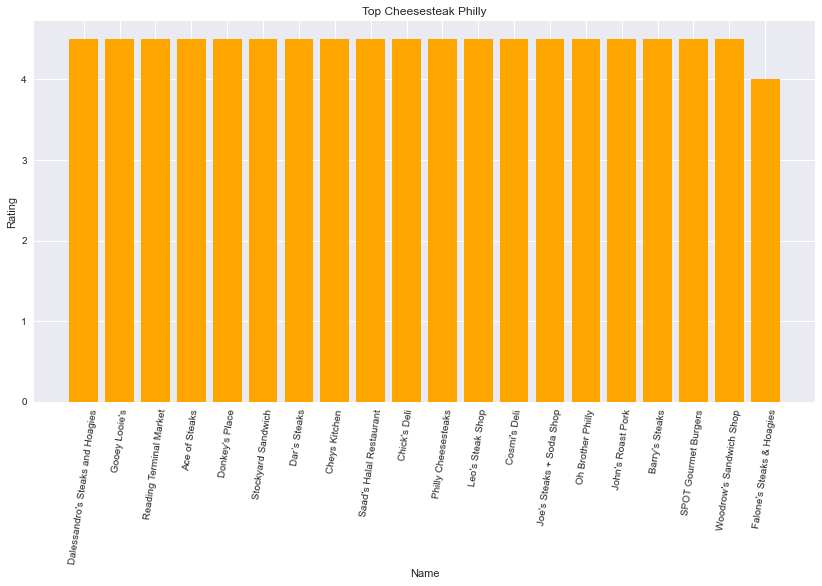

In [51]:
fig, ax = plt.subplots(figsize=(14,7))
x = PhillyCheesesteak['name'][:20]
y = PhillyCheesesteak['rating'][:20]
ax.set_xlabel('Name')
ax.set_ylabel('Rating')
ax.set_title('Top Cheesesteak Philly')
plt.xticks(rotation=82)
ax.bar(x,y, color = 'orange')

plt.savefig('CheesesteakPhilly_namerating')

In [52]:
# fig, ax = plt.subplots(figsize=(14,7))
# x = PhillyCheesesteak['name'][:20]
# y = {'$', '$$'}
# ax.set_xlabel('Name')
# ax.set_ylabel('Cost')
# ax.set_title('Top Ice Cream Philly')
# plt.xticks(rotation=82)
# ax.bar(x,y, color = 'orange')

In [76]:
def price(price):
    if PhillyCheesesteak['price'] == '$':
        return 1
    elif PhillyCheesesteak['price'] == '$$':
        return 2

In [96]:
PhillyCheesesteak['price'].dropna(inplace = True)

In [106]:
prices = []
for price in PhillyCheesesteak['price']:
    # price
    if price == '$':
        price = 1
    elif price == '$$':
        price = 2
    prices.append(price)
prices

[1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2]

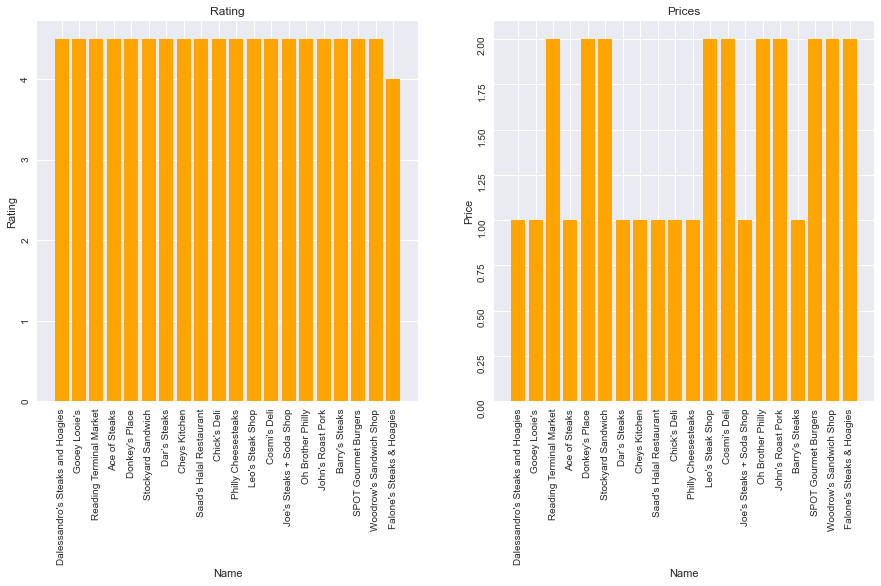

In [177]:
fig, ax = plt.subplots(1,2, figsize = (15,7));
x = PhillyCheesesteak['name']
y = PhillyCheesesteak['rating']
y1 = prices
ax[0].bar(x[:20], y[:20], color = 'orange')
ax[0].set_title('Rating')
ax[0].set_xlabel('Name')
ax[0].set_ylabel('Rating')
ax[1].bar(x[:20], y1[:20], color = 'orange')
ax[1].set_title('Prices')
ax[1].set_xlabel('Name')
ax[1].set_ylabel('Price')
# plt.yticks(1,2)
for ax in fig.axes:
    ax.tick_params(rotation=90)
# plt.xticks(rotation = 90)

In [200]:
MY_API_KEY = "227vlJRYFiz_F0D8jfqDblADE28so5LV5HcaRKWz8rn2P1iqCdykA6qXgmaLtPrSBYwq94mKhNt7V0rdWWGJKmBEYec3n80Q6XWRQkvuVbKiETkVLEoNwBRTTzVqX3Yx"


term = 'sushi'
location = 'NYC'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response_sushiNYC = requests.get(url, headers=headers, params=url_params)

In [202]:
print(response_sushiNYC)

<Response [200]>


In [203]:
sushiNYC = json.loads(response_sushiNYC.text)
print(type(sushiNYC))

<class 'dict'>


In [204]:
sushiNYC = pd.DataFrame.from_dict(sushiNYC['businesses'])

In [205]:
sushiNYC.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price
0,2_zM-VTPBINeV74yqlho9w,ooi-sushi-and-bar-new-york,Ooi Sushi and Bar,https://s3-media1.fl.yelpcdn.com/bphoto/U0HanU...,False,https://www.yelp.com/biz/ooi-sushi-and-bar-new...,6,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...",4.5,"{'latitude': 40.749814, 'longitude': -73.941476}","[delivery, pickup]","{'address1': '42-36 Crescent St', 'address2': ...",+17184331888,(718) 433-1888,6644.477912,NaN
1,7Q68kpPS6okcC8Kkw7g42A,sushi-lab-rooftop-nyc-new-york-2,Sushi Lab Rooftop NYC,https://s3-media2.fl.yelpcdn.com/bphoto/EZdrhe...,False,https://www.yelp.com/biz/sushi-lab-rooftop-nyc...,49,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",4.5,"{'latitude': 40.758417, 'longitude': -73.983301}",[],"{'address1': '132 West 47th St', 'address2': N...",+12124320000,(212) 432-0000,5961.292620,NaN
2,HWPh33x1lrHvBu-DstSPLA,daigo-sushi-roll-bar-brooklyn,Daigo Sushi Roll Bar,https://s3-media2.fl.yelpcdn.com/bphoto/ZO2j8D...,False,https://www.yelp.com/biz/daigo-sushi-roll-bar-...,9,"[{'alias': 'sushi', 'title': 'Sushi Bars'}]",5.0,"{'latitude': 40.676541, 'longitude': -73.98445}","[delivery, pickup]","{'address1': '527 Carroll St', 'address2': '',...",+19179091504,(917) 909-1504,3319.378151,NaN
3,22CRLIEfJWIO-8RjEiecAg,akino-elmhurst,Akino,https://s3-media1.fl.yelpcdn.com/bphoto/7OaFod...,False,https://www.yelp.com/biz/akino-elmhurst?adjust...,762,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...",4.5,"{'latitude': 40.7411784, 'longitude': -73.8814...","[delivery, pickup]","{'address1': '82-80 Broadway', 'address2': '',...",+17187798280,(718) 779-8280,10308.184564,$$
4,itblJyiTY2h2ACidLk66oA,takahachi-new-york,Takahachi,https://s3-media2.fl.yelpcdn.com/bphoto/hEeWHg...,False,https://www.yelp.com/biz/takahachi-new-york?ad...,563,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...",4.0,"{'latitude': 40.725315, 'longitude': -73.984436}",[],"{'address1': '85 Ave A', 'address2': '', 'addr...",+12125056524,(212) 505-6524,2353.328014,$$


In [206]:
sushiNYC.columns

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'location',
       'phone', 'display_phone', 'distance', 'price'],
      dtype='object')

In [207]:
sushiNYC = sushiNYC.loc[:,['name', 'alias', 'rating', 'location', 'review_count']]

In [209]:
sushiNYC = sushiNYC.sort_values('rating', ascending=False)
sushiNYC

,name,alias,rating,location,review_count
2,Daigo Sushi Roll Bar,daigo-sushi-roll-bar-brooklyn,5.0,"{'address1': '527 Carroll St', 'address2': '',...",9
47,Temakase,temakase-new-york,5.0,"{'address1': '157 Second Ave', 'address2': Non...",8
26,Takumi Japanese Cuisine,takumi-japanese-cuisine-new-york,5.0,"{'address1': '114 Eldridge St', 'address2': ''...",5
32,Sushi On Me,sushi-on-me-jackson-heights,5.0,"{'address1': '71-26 Roosevelt Ave', 'address2'...",28
0,Ooi Sushi and Bar,ooi-sushi-and-bar-new-york,4.5,"{'address1': '42-36 Crescent St', 'address2': ...",6
34,Go Sushi,go-sushi-new-york-4,4.5,"{'address1': '86 Madison St', 'address2': None...",22
1,Sushi Lab Rooftop NYC,sushi-lab-rooftop-nyc-new-york-2,4.5,"{'address1': '132 West 47th St', 'address2': N...",49
27,Kura,kura-new-york,4.5,"{'address1': '130 St Marks Pl', 'address2': ''...",475
29,Sashimi Ramen Express,sashimi-ramen-express-new-york,4.5,"{'address1': '341 E 78th St', 'address2': '', ...",312
37,KazuNori | The Original Hand Roll Bar,kazunori-the-original-hand-roll-bar-new-york-2,4.5,"{'address1': '15 W 28th St', 'address2': None,...",949


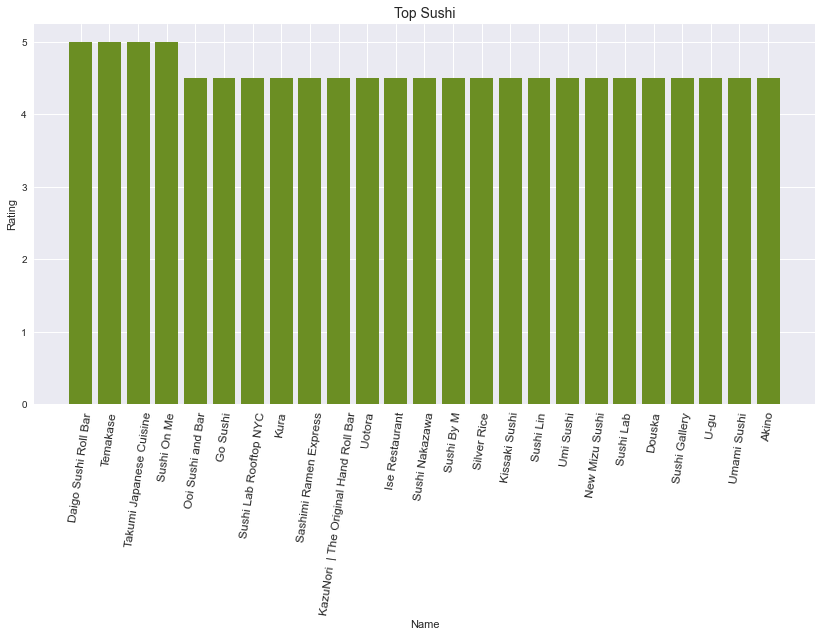

In [293]:
fig, ax = plt.subplots(figsize=(14,7))
x = sushiNYC['name'][:25]
y = sushiNYC['rating'][:25]
ax.set_xlabel('Name')
ax.set_ylabel('Rating')
ax.set_title('Top Sushi', fontsize =14)
plt.xticks(rotation=82, fontsize = 12)
ax.bar(x,y, color = 'olivedrab')

plt.savefig('graphs/SushiNYC_namerating')

In [282]:
MY_API_KEY = "227vlJRYFiz_F0D8jfqDblADE28so5LV5HcaRKWz8rn2P1iqCdykA6qXgmaLtPrSBYwq94mKhNt7V0rdWWGJKmBEYec3n80Q6XWRQkvuVbKiETkVLEoNwBRTTzVqX3Yx"


term = 'public restrooms'
location = 'NYC'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response_restroomsNYC = requests.get(url, headers=headers, params=url_params)

In [283]:
print(response_restroomsNYC)

<Response [200]>


In [284]:
restroomsNYC = json.loads(response_restroomsNYC.text)
print(type(restroomsNYC))

<class 'dict'>


In [285]:
restroomsNYC = pd.DataFrame.from_dict(restroomsNYC['businesses'])

In [286]:
restroomsNYC.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price
0,FCdF5gJYJdnqBfYSVs6EqA,domino-park-brooklyn-2,Domino Park,https://s3-media3.fl.yelpcdn.com/bphoto/kl1ne0...,False,https://www.yelp.com/biz/domino-park-brooklyn-...,96,"[{'alias': 'parks', 'title': 'Parks'}]",4.5,"{'latitude': 40.713722, 'longitude': -73.968444}",[],"{'address1': '15 River St', 'address2': '', 'a...",+12124842700,(212) 484-2700,2365.209817,NaN
1,h5NhONSdSSXdaQc2IYPjjQ,columbus-park-new-york,Columbus Park,https://s3-media1.fl.yelpcdn.com/bphoto/EIr5hZ...,False,https://www.yelp.com/biz/columbus-park-new-yor...,75,"[{'alias': 'parks', 'title': 'Parks'}]",4.0,"{'latitude': 40.715666, 'longitude': -73.999997}",[],"{'address1': '67 Mulberry St', 'address2': '',...",+12124080100,(212) 408-0100,1234.035448,NaN
2,riGhXci7Xo-Gp9gtl5IBYA,brooklyn-bridge-park-brooklyn-3,Brooklyn Bridge Park,https://s3-media2.fl.yelpcdn.com/bphoto/-o3O0Q...,False,https://www.yelp.com/biz/brooklyn-bridge-park-...,520,"[{'alias': 'parks', 'title': 'Parks'}]",4.5,"{'latitude': 40.7016262778116, 'longitude': -7...",[],"{'address1': '334 Furman St', 'address2': None...",+17182229939,(718) 222-9939,490.719295,NaN
3,xOw4aafJRji9XomGunlvcQ,central-park-new-york,Central Park,https://s3-media2.fl.yelpcdn.com/bphoto/ru79-O...,False,https://www.yelp.com/biz/central-park-new-york...,2484,"[{'alias': 'parks', 'title': 'Parks'}]",5.0,"{'latitude': 40.782418740809, 'longitude': -73...",[],"{'address1': '14 E 60th St', 'address2': '', '...",,,8893.835856,NaN
4,LdsMCjAfFV92PdykWWdFmg,new-york-public-library-mulberry-street-librar...,New York Public Library - Mulberry Street Library,https://s3-media3.fl.yelpcdn.com/bphoto/y3GtYJ...,False,https://www.yelp.com/biz/new-york-public-libra...,47,"[{'alias': 'libraries', 'title': 'Libraries'}]",4.0,"{'latitude': 40.72434761, 'longitude': -73.995...",[],"{'address1': '10 Jersey St', 'address2': '', '...",+12129663424,(212) 966-3424,2105.260627,NaN


In [287]:
restroomsNYC.columns

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'location',
       'phone', 'display_phone', 'distance', 'price'],
      dtype='object')

In [288]:
restroomsNYC = restroomsNYC.loc[:,['name', 'alias', 'location', 'rating', 'review_count']].sort_values('rating')

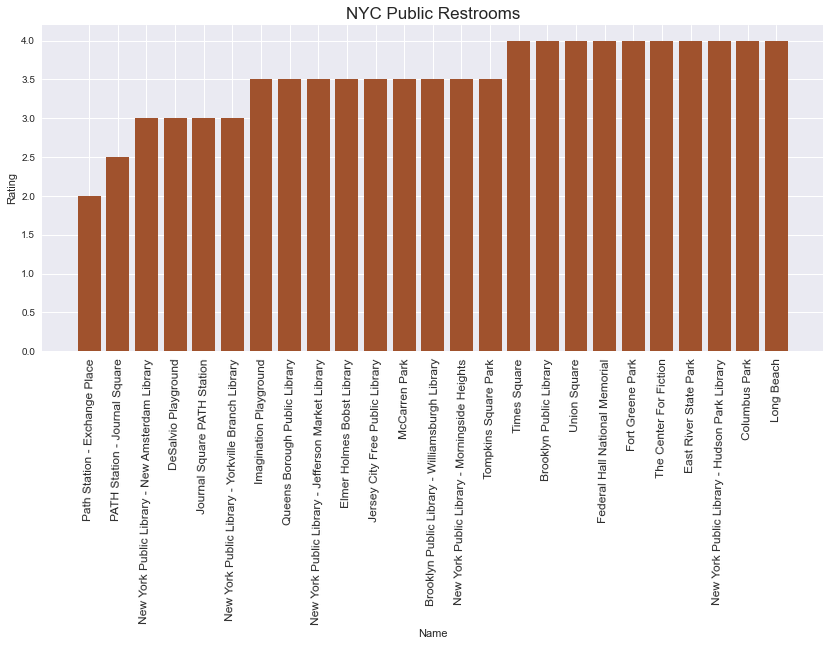

In [292]:
fig, ax = plt.subplots(figsize=(14,6))
x = restroomsNYC['name'][:25]
y = restroomsNYC['rating'][:25]
ax.set_xlabel('Name')
ax.set_ylabel('Rating')
ax.set_title('NYC Public Restrooms', fontsize =17)
plt.xticks(rotation=89, fontsize = 12)
ax.bar(x,y, color = 'sienna')

plt.savefig('graphs/restroomsNYC_namerating')

In [16]:
MY_API_KEY = "227vlJRYFiz_F0D8jfqDblADE28so5LV5HcaRKWz8rn2P1iqCdykA6qXgmaLtPrSBYwq94mKhNt7V0rdWWGJKmBEYec3n80Q6XWRQkvuVbKiETkVLEoNwBRTTzVqX3Yx"


term = 'ice cream'
location = 'Bergen County'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response_icecreamBergen = requests.get(url, headers=headers, params=url_params)

In [17]:
print(response_icecreamBergen)

<Response [200]>


In [18]:
icecreamBergen = json.loads(response_icecreamBergen.text)
print(type(icecreamBergen))

<class 'dict'>


In [19]:
for key in icecreamBergen.keys():
    print(key)

businesses
total
region


In [20]:
icecreamBergen = pd.DataFrame.from_dict(icecreamBergen['businesses'])
icecreamBergen.head(7)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price
0,sZa_afCXD8Izr8KWX5CP2A,stack-creamery-westwood,Stack Creamery,https://s3-media2.fl.yelpcdn.com/bphoto/jV7yVX...,False,https://www.yelp.com/biz/stack-creamery-westwo...,23,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",5.0,"{'latitude': 40.99264, 'longitude': -74.02973}","[pickup, delivery]","{'address1': '287 Westwood Ave', 'address2': N...",+12017224780,(201) 722-4780,6887.748999,NaN
1,J1oBixicsaIkVZm_xXxR1w,van-dyks-ice-cream-ridgewood,Van Dyk's Ice Cream,https://s3-media3.fl.yelpcdn.com/bphoto/UMXy8r...,False,https://www.yelp.com/biz/van-dyks-ice-cream-ri...,233,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.0,"{'latitude': 40.97746, 'longitude': -74.12731}",[delivery],"{'address1': '145 Ackerman Ave', 'address2': '...",+12014441429,(201) 444-1429,5073.008529,$$
2,bb9THFQsQOh8L7rTE5y2SQ,ice-cream-by-mike-ridgewood,Ice Cream by Mike,https://s3-media1.fl.yelpcdn.com/bphoto/FAw6TI...,False,https://www.yelp.com/biz/ice-cream-by-mike-rid...,171,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.5,"{'latitude': 40.97872, 'longitude': -74.11286}",[],"{'address1': '305 East Ridgewood Ave', 'addres...",+12013434514,(201) 343-4514,4394.902667,$
3,WFJGWpk6lh7FzefCrdGGJw,bellvale-farms-creamery-warwick-3,Bellvale Farms Creamery,https://s3-media1.fl.yelpcdn.com/bphoto/0tuFmT...,False,https://www.yelp.com/biz/bellvale-farms-creame...,336,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.5,"{'latitude': 41.2446597, 'longitude': -74.2817...",[],"{'address1': '1390 NY-17A', 'address2': '', 'a...",+18459881818,(845) 988-1818,37424.658578,$
4,bgnGi67zRF-7P-0itiSFBg,brainfreeze-new-milford-3,BrainFreeze,https://s3-media2.fl.yelpcdn.com/bphoto/Klc1e2...,False,https://www.yelp.com/biz/brainfreeze-new-milfo...,68,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.0,"{'latitude': 40.9408, 'longitude': -74.02192}","[pickup, delivery]","{'address1': '370 River Rd', 'address2': '', '...",+12012655055,(201) 265-5055,5212.066655,$
5,adf0wZbOixaPO4eMWpZvIQ,piermont-creamery-piermont-2,Piermont Creamery,https://s3-media2.fl.yelpcdn.com/bphoto/wZm4tu...,False,https://www.yelp.com/biz/piermont-creamery-pie...,11,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.0,"{'latitude': 41.041561, 'longitude': -73.9167618}",[],"{'address1': '530 Piermont Ave', 'address2': '...",+18453989000,(845) 398-9000,17576.132456,NaN
6,1Bn6mCmdJ9ZL8ZiLfw4RoQ,bischoffs-ice-cream-and-candy-teaneck,Bischoff's Ice Cream & Candy,https://s3-media2.fl.yelpcdn.com/bphoto/NiOPMx...,False,https://www.yelp.com/biz/bischoffs-ice-cream-a...,219,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.0,"{'latitude': 40.8892248, 'longitude': -74.0227...",[delivery],"{'address1': '468 Cedar Ln', 'address2': '', '...",+12018360333,(201) 836-0333,8138.304832,$


In [22]:
icecreamBergen.columns

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'location',
       'phone', 'display_phone', 'distance', 'price'],
      dtype='object')

In [25]:
icecreamBergen = icecreamBergen.loc[:, ['name', 'review_count', 'rating', 'location', 'price']].sort_values('rating', ascending = False)
icecreamBergen

,name,review_count,rating,location,price
0,Stack Creamery,23,5.0,"{'address1': '287 Westwood Ave', 'address2': N...",NaN
17,Randy’s Homemade Ice Cream,1,5.0,"{'address1': '322 Wanaque Ave', 'address2': 'S...",NaN
48,Seven Scoops & Sips,46,5.0,"{'address1': '321 Changebridge Rd', 'address2'...",NaN
49,How Delish HD,35,5.0,"{'address1': '55 Kingsley St', 'address2': '',...",NaN
27,Guernsey Crest Ice Cream Co,82,4.5,"{'address1': '134 19th Ave', 'address2': '', '...",$
23,Last Licks Homemade Ice Cream,109,4.5,"{'address1': '134 Ridgedale Ave', 'address2': ...",$
26,Scoop House,59,4.5,"{'address1': '813 Main St', 'address2': None, ...",$
28,Penny Lick Ice Cream,65,4.5,"{'address1': '580 Warburton Ave', 'address2': ...",$
30,Falls Creamery,73,4.5,"{'address1': '11 Paterson Ave', 'address2': No...",$
31,Cake & Cone,99,4.5,"{'address1': '306 Paterson Ave', 'address2': '...",$
